In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle
from tqdm import tqdm

In [2]:

%matplotlib inline

## Image data importing 

In [3]:
file_list = []
class_list = []

DATADIR = r'C:\Users\vishal\Downloads\Image classifier_binary\Image Data'
CATEGORIES = ['apple', 'not apple']

In [4]:
# Checking or all images in the data folder

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    print(path)

C:\Users\vishal\Downloads\Image classifier_binary\Image Data\apple
C:\Users\vishal\Downloads\Image classifier_binary\Image Data\not apple


In [5]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    print(path)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        print(img_path)

C:\Users\vishal\Downloads\Image classifier_binary\Image Data\apple
C:\Users\vishal\Downloads\Image classifier_binary\Image Data\apple\apple_1.png
C:\Users\vishal\Downloads\Image classifier_binary\Image Data\apple\apple_2.png
C:\Users\vishal\Downloads\Image classifier_binary\Image Data\apple\apple_3.png
C:\Users\vishal\Downloads\Image classifier_binary\Image Data\apple\apple_4.png
C:\Users\vishal\Downloads\Image classifier_binary\Image Data\apple\apple_5.png
C:\Users\vishal\Downloads\Image classifier_binary\Image Data\apple\apple_6.png
C:\Users\vishal\Downloads\Image classifier_binary\Image Data\apple\apple_7.jpg
C:\Users\vishal\Downloads\Image classifier_binary\Image Data\apple\apple_8.jpg
C:\Users\vishal\Downloads\Image classifier_binary\Image Data\not apple
C:\Users\vishal\Downloads\Image classifier_binary\Image Data\not apple\banana1.jpg
C:\Users\vishal\Downloads\Image classifier_binary\Image Data\not apple\download (1).jpg
C:\Users\vishal\Downloads\Image classifier_binary\Image Dat

C:\Users\vishal\Downloads\Image classifier_binary\Image Data\apple


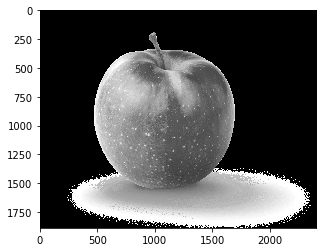

In [6]:
# Checking or all images in the data folder

for category in CATEGORIES:  # do "not apple" and "apple"
    path = os.path.join(DATADIR,category)  # create path to "not apple" and "apple"
    print(path)
    for img in os.listdir(path):  # iterate over each image per "not apple" and "apple"
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [7]:
print(img_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
print(img_array.shape)

(1889, 2400)


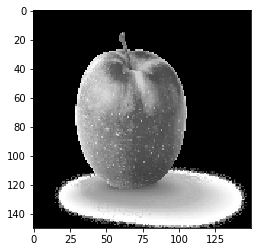

In [9]:
# The size of the images that your neural network will use
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [10]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do apple and not apple
        path = os.path.join(DATADIR,category)  # create path to apple and not apple
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0= apple and  1=apple 

        for img in tqdm(os.listdir(path)):  # iterate over each image per apple and not apple
                img_array = os.path.join(path, img) 
                arr=cv2.imread(img_array, cv2.IMREAD_GRAYSCALE)    # convert to array
                new_array = cv2.resize(arr, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
                
create_training_data()


100%|██████████| 9/9 [00:00<00:00, 562.36it/s]


In [11]:
print(len(training_data))

17


In [12]:
training_data

[[array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 0],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 229, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 0],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0,

In [13]:
# shuffing the data to get better prediction 
random.shuffle(training_data)

In [14]:
#after shuffing 
training_data

[[array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 0],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 1],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 1],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
     

In [15]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
1
0
0
0
0
1


In [16]:
# we've got the classes nicely mixed in! Time to make our model!

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [17]:
# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

## Building the convolutional neural network


In [18]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [19]:
# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))


In [20]:
X

array([[[[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        ...,

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]]],


       [[[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [

In [21]:
y

[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1]

In [22]:
# feature scaling ... lesser the value faster computation
# normalizing data (a pixel goes from 0 to 255)# normalizing data (a pixel goes from 0 to 255)
X = X/255

In [23]:
X

array([[[[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        ...,

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]]],


       [[[1.        ],
         [1.        ],
         [1.  

In [24]:
X.shape

(17, 150, 150, 1)

## Building the model 

In [25]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

#model.add(Flatten())

#model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))
# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

#model.add(Dense(2, activation = 'softmax'))
model.add(Dense(2))
model.add(Activation("softmax"))


In [26]:
# Compiling the model using some basic parameters
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images


IMG_SIZE = 150

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)

history = model.fit(X, y, batch_size=6, epochs=40, validation_split=0.3)

Train on 11 samples, validate on 6 samples
Epoch 1/40
11/11 [==============================] - 4s 362ms/sample - loss: 1.0416 - accuracy: 0.4545 - val_loss: 0.6767 - val_accuracy: 0.6667
Epoch 2/40
11/11 [==============================] - 1s 76ms/sample - loss: 0.7267 - accuracy: 0.6364 - val_loss: 0.7337 - val_accuracy: 0.3333
Epoch 3/40
11/11 [==============================] - 1s 69ms/sample - loss: 0.6893 - accuracy: 0.5455 - val_loss: 0.6990 - val_accuracy: 0.3333
Epoch 4/40
11/11 [==============================] - 1s 69ms/sample - loss: 0.6414 - accuracy: 0.5455 - val_loss: 0.6679 - val_accuracy: 0.6667
Epoch 5/40
11/11 [==============================] - 1s 68ms/sample - loss: 0.5928 - accuracy: 0.9091 - val_loss: 0.6198 - val_accuracy: 0.8333
Epoch 6/40
11/11 [==============================] - 1s 66ms/sample - loss: 0.5332 - accuracy: 0.8182 - val_loss: 0.5449 - val_accuracy: 0.8333
Epoch 7/40
11/11 [==============================] - 1s 69ms/sample - loss: 0.4460 - accuracy: 0.81

Saved model to disk
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: CNN.model\assets
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


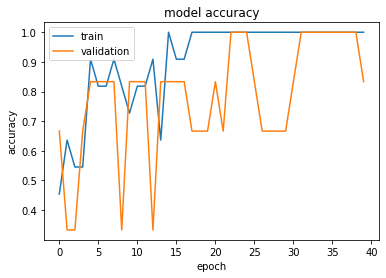

In [28]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

## Test the model

In [29]:
import cv2
import tensorflow as tf


In [30]:
CATEGORIES = ['apple', 'not apple']


In [31]:
def prepare(file):
    IMG_SIZE = 150
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img_array = img_array/255.0
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [37]:
model = tf.keras.models.load_model("CNN.model")
prediction = model.predict([prepare("apple.jpg")])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])


[[5.704926e-06 9.999943e-01]]
apple


In [38]:
model = tf.keras.models.load_model("CNN.model")
prediction = model.predict([prepare("banana.jpg")])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])


[[1.000000e+00 8.779465e-10]]
not apple
